# Leash Bio - Predict New Medicines with BELKA

Nous avons décidé d'importer des parquets avec polars après quelques tests et des lectures d'articles.

| Import de test | pandas | polars |
|----------------|--------|--------|
| csv            | 4,19 s | 0,56 s |
| parquet        | 1,3 s  | 0,45 s |


| binds | count    |
|-------|----------|
| 0     | 293656924|
| 1     | 1589906  |

https://medium.com/@mariusz_kujawski/converting-csv-files-to-parquet-with-polars-pandas-dask-and-dackdb-52a77378349d
https://medium.com/cuenex/pandas-2-0-vs-polars-the-ultimate-battle-a378eb75d6d1#:~:text=Polars%20appear%20to%20be%20the,Pandas%202.0%20(numpy%20backend)

In [ ]:
import numpy as np
import pandas as pd
import polars as pl
import time

Import from gdrive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd '/content/drive/MyDrive/kaggle/Leash BELKA'

Import from kaggle

In [ ]:
# # 1. Install Kaggle
# !pip install -q kaggle
# # 2. Import the files module from Colab and upload the kaggle.json file
# from google.colab import files
# files.upload()  # Choose the kaggle.json file that you downloaded

# # 3. Make a directory named '.kaggle' and copy the kaggle.json file there
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/

# # 4. Change the permissions of the file
# !chmod 600 ~/.kaggle/kaggle.json

# # # 5. Check if everything's okay by listing Kaggle datasets
# # !kaggle datasets list

# # 6. Download the competition data (replace 'name-of-competition' with the actual competition name)
# !kaggle competitions download -c 'leash-BELKA'

# # 7. Create a directory named 'train' and unzip the data there
# !mkdir train
# !unzip leash-BELKA.zip -d train

In [ ]:
start_time = time.time()
train_df = pl.read_parquet("train99999.parquet") #on ne peut pas importer plus, rip la ram
end_time = time.time()

elapsed_time = end_time - start_time

print(f"Temps écoulé: {elapsed_time:.2f} secondes")

Temps écoulé: 0.21 secondes


In [ ]:
train_df.head()

id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name,binds
i64,str,str,str,str,str,i64
0,"""C#CC[C@@H](CC(…","""C#CCOc1ccc(CN)…","""Br.Br.NCC1CCCN…","""C#CCOc1ccc(CNc…","""BRD4""",0
1,"""C#CC[C@@H](CC(…","""C#CCOc1ccc(CN)…","""Br.Br.NCC1CCCN…","""C#CCOc1ccc(CNc…","""HSA""",0
2,"""C#CC[C@@H](CC(…","""C#CCOc1ccc(CN)…","""Br.Br.NCC1CCCN…","""C#CCOc1ccc(CNc…","""sEH""",0
3,"""C#CC[C@@H](CC(…","""C#CCOc1ccc(CN)…","""Br.NCc1cccc(Br…","""C#CCOc1ccc(CNc…","""BRD4""",0
4,"""C#CC[C@@H](CC(…","""C#CCOc1ccc(CN)…","""Br.NCc1cccc(Br…","""C#CCOc1ccc(CNc…","""HSA""",0


In [ ]:
train_df['binds'].value_counts()

binds,count
i64,u32
1,235
0,99764


## Séparation en fonction de la protéine

Finalement je ne sais pas vraiment si c'est bien de séparer les protéines car qu'est-ce qui nous dit qu'il n'y a pas d'influence ? Par exemple que si la molécule fusionne avec HSA, il y a de forte chance qu'elle fusionne avec sEH aussi ? On n'en sait rien donc bon jsp, je sépare quand même ici au cas où

In [ ]:
train_df['protein_name'].value_counts()

protein_name,count
str,u32
"""HSA""",33333
"""BRD4""",33333
"""sEH""",33333


In [ ]:
train_brd = train_df.filter(train_df['protein_name'] == "BRD4")
train_hsa = train_df.filter(train_df['protein_name'] == "HSA")
train_seh = train_df.filter(train_df['protein_name'] == "sEH")

print(train_brd.head())
print(train_hsa.head())
print(train_seh.head())

shape: (5, 7)
┌─────┬─────────────────┬─────────────────┬────────────────┬────────────────┬──────────────┬───────┐
│ id  ┆ buildingblock1_ ┆ buildingblock2_ ┆ buildingblock3 ┆ molecule_smile ┆ protein_name ┆ binds │
│ --- ┆ smiles          ┆ smiles          ┆ _smiles        ┆ s              ┆ ---          ┆ ---   │
│ i64 ┆ ---             ┆ ---             ┆ ---            ┆ ---            ┆ str          ┆ i64   │
│     ┆ str             ┆ str             ┆ str            ┆ str            ┆              ┆       │
╞═════╪═════════════════╪═════════════════╪════════════════╪════════════════╪══════════════╪═══════╡
│ 0   ┆ C#CC[C@@H](CC(= ┆ C#CCOc1ccc(CN)c ┆ Br.Br.NCC1CCCN ┆ C#CCOc1ccc(CNc ┆ BRD4         ┆ 0     │
│     ┆ O)O)NC(=O)OCC1c ┆ c1.Cl           ┆ 1c1cccnn1      ┆ 2nc(NCC3CCCN3c ┆              ┆       │
│     ┆ 2c…             ┆                 ┆                ┆ 3ccc…          ┆              ┆       │
│ 3   ┆ C#CC[C@@H](CC(= ┆ C#CCOc1ccc(CN)c ┆ Br.NCc1cccc(Br ┆ C#CCOc1ccc(CNc ┆

In [ ]:
train_brd['binds'].value_counts()

binds,count
i64,u32
1,82
0,33251


In [ ]:
print("Number of lines ",82 + 33251)
print("Proportion of negative class",33251 / (82 + 33251))
print("Proportion of positive class",82 / (82 + 33251))

Number of lines  33333
Proportion of negative class 0.997539975399754
Proportion of positive class 0.0024600246002460025


In [ ]:
# Proportions of each class
proportion_negative = 0.9975
proportion_positive = 0.0025

# Calculate class weights
weight_negative = 1.0 / proportion_negative
weight_positive = 1.0 / proportion_positive

print("Weight for negative class:", weight_negative)
print("Weight for positive class:", weight_positive)


weight_negative = 1.0 / proportion_negative
weight_positive = 1.0 / proportion_positive

Weight for negative class: 1.0025062656641603
Weight for positive class: 400.0


Count the number of symbols

In [ ]:
# from collections import Counter

# # Initialize a Counter to keep track of symbol counts
# symbol_counter = Counter()

# # Iterate over each SMILES string and update the counter
# for smiles in train['molecule_smiles'].sample(100):
#     symbol_counter.update(smiles)

# # Print the symbol counts
# for symbol, count in symbol_counter.items():
#     print(f'{symbol}: {count}')

In [ ]:
smiles_data = list(train_brd["molecule_smiles"])
labels = list(train_brd["binds"])

In [ ]:
pip install periodictable

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for periodictable: filename=periodictable-1.7.0-py3-none-any.whl size=752513 sha256=d05431902350d9e20d0541b057627fe1935f0b83472b33f146249a1c4d6a9eb5
  Stored in directory: /root/.cache/pip/wheels/7e/19/a2/fef5d0ca2b1ad2b199e863a6e796ad9d5efc86563d80c91a0c
Successfully built periodictable


In [ ]:
import periodictable

# Initialize a set to store unique characters
unique_chars = set()

# Iterate through the dataset and collect SMILES strings
for i in range(len(smiles_data)):
    smiles = smiles_data[i]
    j = 0
    while j < len(smiles):
        # Check for two-letter atom symbols
        if j < len(smiles) - 1 and smiles[j].isupper() and smiles[j + 1].islower():
            # Combine uppercase and lowercase letters
            symbol = smiles[j:j + 2]
            try:
                element = periodictable.elements.symbol(symbol)
                unique_chars.add(symbol)
            except ValueError:
                pass  # Ignore if the pair is not a valid atomic symbol

            j += 2  # Move to the next character pair
        else:
            unique_chars.add(smiles[j])
            j += 1

# Print the unique characters
print(f"Unique characters in the dataset: {sorted(unique_chars)}")

Unique characters in the dataset: ['#', '(', ')', '+', '-', '/', '1', '2', '3', '4', '5', '6', '7', '=', '@', 'B', 'Br', 'C', 'Cl', 'Cn', 'Dy', 'F', 'H', 'N', 'O', 'S', 'Sc', 'Si', '[', ']', 'c', 'n', 'o', 's']


Fonction pour convertir les chaînes SMILES en matrices de caractéristiques

In [ ]:
len(unique_chars)

34

In [ ]:
def smiles_to_feature_matrix(smiles, max_length=400):
    # Dictionnaire de correspondance des caractères SMILES aux vecteurs de caractéristiques
    smiles_dict = {char: i for i, char in enumerate(unique_chars)} #enumerate("CNOFSPBrc=()[]#1234567890")}
    feature_matrix = np.zeros((len(smiles), max_length, 42), dtype=np.float32)

    for i, smi in enumerate(smiles):
        for j, char in enumerate(smi):
            if char in smiles_dict:
                feature_matrix[i, j, smiles_dict[char]] = 1.0
        feature_matrix[i, len(smi):, -1] = 1.0  # Padding

    return feature_matrix

Construct Model

The input to this CNN model should be a SMILES feature matrix with shape (batch_size, 42, max_smiles_length), where:
- batch_size is the number of SMILES strings in the batch
- 42 is the number of features for each symbol in the SMILES string (21 for atoms and 21 for SMILES symbols)
- max_smiles_length is the maximum length of SMILES strings in your dataset (padded with zeros if necessary)
You can preprocess the SMILES strings to create the feature matrix using the approach described in the paper. The output of the CNN will be a tensor of shape (batch_size, 1) for binary classification tasks, or (batch_size, num_classes) for multi-class classification tasks

Construct the matrix

In [ ]:
# Assuming you have your SMILES data converted to feature matrix X and labels y
X = smiles_to_feature_matrix(smiles_data)

In [ ]:
X = X[:, :, :]  # Adding a channel dimension
y = np.array(labels, dtype=np.int32)

Training

In [ ]:
X.shape

(33333, 400, 42)

PyTorch

In [ ]:
!pip install torch torchvision -U

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

# Assuming X and y are your input data and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train)
X_test = torch.tensor(X_test)
y_train = torch.tensor(y_train)
y_test = torch.tensor(y_test)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch.nn as nn
import torch.optim as optim
import torch.nn as nn
from tqdm import tqdm


class SMILES_CNN(nn.Module):
    def __init__(self):
        super(SMILES_CNN, self).__init__()

        # Define the convolutional layers
        # self.conv1 = nn.Conv1d(in_channels=42, out_channels=64, kernel_size=5, padding=2)
        # self.conv2 = nn.Conv1d(in_channels=64, out_channels=64, kernel_size=5, padding=2)
        self.conv1 = nn.Conv1d(in_channels=400, out_channels=64, kernel_size=5, padding=2)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=64, kernel_size=5, padding=2)

        # Define the pooling layers
        self.pool1 = nn.MaxPool1d(kernel_size=2)
        self.pool2 = nn.MaxPool1d(kernel_size=2)

        # Define the fully connected layers
        self.fc1 = nn.Linear(640, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        # Convolutional and pooling layers
        x = self.pool1(nn.functional.relu(self.conv1(x)))
        x = self.pool2(nn.functional.relu(self.conv2(x)))

        # Flatten the output and pass through fully connected layers
        x = x.view(x.size(0), -1)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))  # Apply sigmoid activation to the output
        # x = self.fc3(x)

        return x

model = SMILES_CNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

num_epochs = 10

for epoch in range(num_epochs):
    loop = tqdm(train_loader, leave=True)  # Move this line inside the outer loop
    for smiles_features, labels in loop:  # Iterate over the tqdm progress bar
        optimizer.zero_grad()
        outputs = model(smiles_features)
        labels = labels.unsqueeze(1).float()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        loop.set_postfix(loss=loss.item())

100%|██████████| 834/834 [00:24<00:00, 33.98it/s, loss=1.69e-6]


In [ ]:
model.eval()
test_loss = 0
test_correct = 0

with torch.no_grad():
    for smiles_features, labels in test_loader:
        outputs = model(smiles_features)
        labels = labels.unsqueeze(1).float()
        test_loss += criterion(outputs, labels).item()

        # Convert output probabilities to predictions
        preds = (outputs > 0.5).float()
        test_correct += (preds == labels).sum().item()

test_loss /= len(test_loader)
test_accuracy = test_correct / len(test_dataset)

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.0405, Test Accuracy: 0.9970


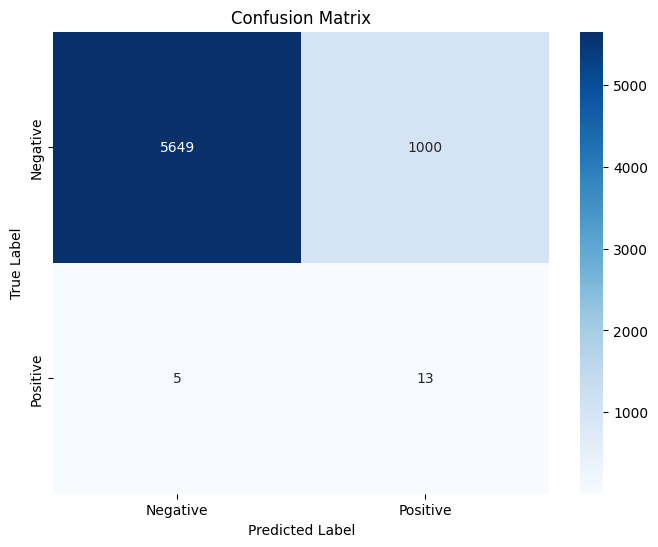

In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming model, test_loader, and test_dataset are defined and available

# Initialize lists to store true labels and predictions
all_labels = []
all_preds = []

# Set the model to evaluation mode
model.eval()

with torch.no_grad():
    for smiles_features, labels in test_loader:
        outputs = model(smiles_features)
        labels = labels.unsqueeze(1).float()

        # Convert output logits to probabilities and then to predictions
        probs = torch.sigmoid(outputs)
        preds = (probs > 0.5).float()

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

# Flatten the lists
all_labels = [label[0] for label in all_labels]
all_preds = [pred[0] for pred in all_preds]

# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## Class weight

100%|██████████| 834/834 [00:21<00:00, 39.26it/s, loss=0.248]


Test Loss: 2.1340, Test Accuracy: 0.9207


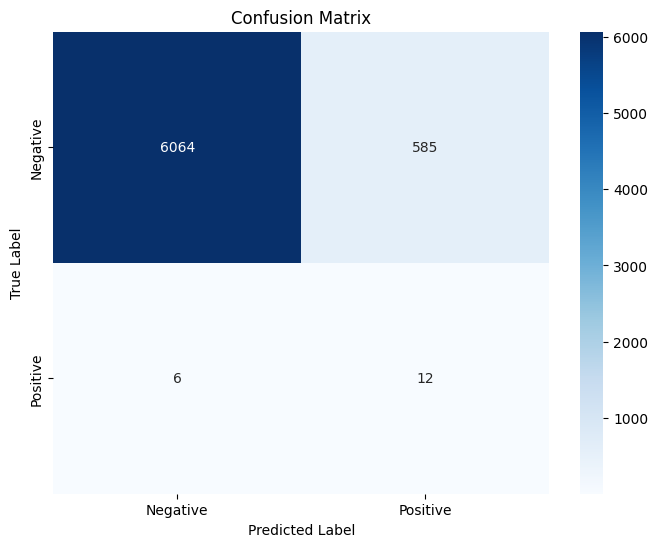

Accuracy: 0.9114
Precision: 0.0201
Recall: 0.6667
F1 Score: 0.0390
ROC-AUC: 0.7893


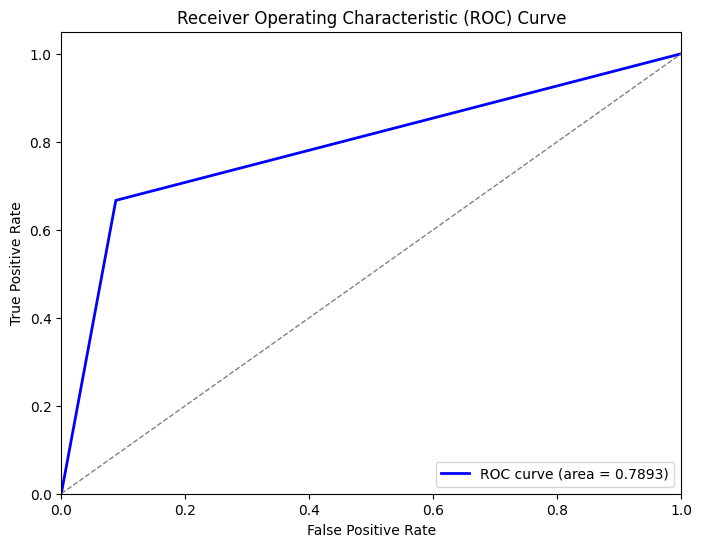

In [ ]:
import torch.nn as nn
import torch.optim as optim
import torch.nn as nn
from tqdm import tqdm

class SMILES_CNN(nn.Module):
    def __init__(self):
        super(SMILES_CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=400, out_channels=64, kernel_size=5, padding=2)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=64, kernel_size=5, padding=2)
        self.pool1 = nn.MaxPool1d(kernel_size=2)
        self.pool2 = nn.MaxPool1d(kernel_size=2)
        self.fc1 = nn.Linear(640, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.pool1(nn.functional.relu(self.conv1(x)))
        x = self.pool2(nn.functional.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)

        return x

model = SMILES_CNN()

class_weights = [weight_negative, weight_positive]
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)
criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights_tensor[1])

lr = 0.001

optimizer = optim.Adam(model.parameters(), lr = lr )
num_epochs = 10

for epoch in range(num_epochs):
    loop = tqdm(train_loader, leave=True)
    for smiles_features, labels in loop:
        optimizer.zero_grad()
        outputs = model(smiles_features)
        labels = labels.unsqueeze(1).float()  # Adjust labels shape to [batch_size, 1]
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        loop.set_postfix(loss=loss.item())

model.eval()
test_loss = 0
test_correct = 0

with torch.no_grad():
    for smiles_features, labels in test_loader:
        outputs = model(smiles_features)
        labels = labels.unsqueeze(1).float()
        test_loss += criterion(outputs, labels).item()

        # Convert output probabilities to predictions
        preds = (outputs > 0.5).float()
        test_correct += (preds == labels).sum().item()

test_loss /= len(test_loader)
test_accuracy = test_correct / len(test_dataset)

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)

# Assuming model, test_loader, and test_dataset are defined and available

# Initialize lists to store true labels and predictions
all_labels = []
all_preds = []

# Set the model to evaluation mode
model.eval()

with torch.no_grad():
    for smiles_features, labels in test_loader:
        outputs = model(smiles_features)
        labels = labels.unsqueeze(1).float()

        # Convert output logits to probabilities and then to predictions
        probs = torch.sigmoid(outputs)
        preds = (probs > 0.5).float()

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

# Flatten the lists
all_labels = [label[0] for label in all_labels]
all_preds = [pred[0] for pred in all_preds]

# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Compute other metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)
roc_auc = roc_auc_score(all_labels, all_preds)

# Display the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(all_labels, all_preds)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from torchsummary import summary

# Create your PyTorch model
model = SMILES_CNN()

# Print the model summary
summary(model, input_size=(400, height, width))

Improved model

In [ ]:
import torch.nn as nn
import torch.optim as optim
import torch.nn as nn
from tqdm import tqdm

class SMILES_CNN(nn.Module):
    def __init__(self):
        super(SMILES_CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=400, out_channels=64, kernel_size=5, padding=2)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=64, kernel_size=5, padding=2)
        self.pool1 = nn.MaxPool1d(kernel_size=2)
        self.pool2 = nn.MaxPool1d(kernel_size=2)
        self.fc1 = nn.Linear(640, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.pool1(nn.functional.relu(self.conv1(x)))
        x = self.pool2(nn.functional.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)

        return x

model = SMILES_CNN()

class_weights = [weight_negative, weight_positive]
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)
criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights_tensor[1])

optimizer = optim.Adam(model.parameters(), lr = 0.001 )
num_epochs = 10

for epoch in range(num_epochs):
    loop = tqdm(train_loader, leave=True)
    for smiles_features, labels in loop:
        optimizer.zero_grad()
        outputs = model(smiles_features)
        labels = labels.unsqueeze(1).float()  # Adjust labels shape to [batch_size, 1]
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        loop.set_postfix(loss=loss.item())

model.eval()
test_loss = 0
test_correct = 0

with torch.no_grad():
    for smiles_features, labels in test_loader:
        outputs = model(smiles_features)
        labels = labels.unsqueeze(1).float()
        test_loss += criterion(outputs, labels).item()

        # Convert output probabilities to predictions
        preds = (outputs > 0.5).float()
        test_correct += (preds == labels).sum().item()

test_loss /= len(test_loader)
test_accuracy = test_correct / len(test_dataset)

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)

# Assuming model, test_loader, and test_dataset are defined and available

# Initialize lists to store true labels and predictions
all_labels = []
all_preds = []

# Set the model to evaluation mode
model.eval()

with torch.no_grad():
    for smiles_features, labels in test_loader:
        outputs = model(smiles_features)
        labels = labels.unsqueeze(1).float()

        # Convert output logits to probabilities and then to predictions
        probs = torch.sigmoid(outputs)
        preds = (probs > 0.5).float()

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

# Flatten the lists
all_labels = [label[0] for label in all_labels]
all_preds = [pred[0] for pred in all_preds]

# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Compute other metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)
roc_auc = roc_auc_score(all_labels, all_preds)

# Display the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(all_labels, all_preds)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()